In [1]:
!wget -q https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv -O Jamboree_Admission.csv

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge

In [3]:
df = pd.read_csv("Jamboree_Admission.csv").drop("Serial No.", axis=1)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
df.columns = [ 'GRE Score',	'TOEFL Score',	'University Rating', 'SOP',	'LOR',	'CGPA',	'Research',	'Chance of Admit']
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.duplicated().sum()

0

In [ ]:
# Normalization
df['GRE Score'] = df['GRE Score']/360
df['TOEFL Score'] = df['TOEFL Score']/120
df['University Rating'] = df['University Rating']/5
df['SOP'] =	df['SOP']/5
df['LOR'] =	df['LOR']/5
df['CGPA'] = df['CGPA']/10
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0.936111,0.983333,0.8,0.9,0.9,0.965,1,0.92
1,0.900000,0.891667,0.8,0.8,0.9,0.887,1,0.76
2,0.877778,0.866667,0.6,0.6,0.7,0.800,1,0.72
3,0.894444,0.916667,0.6,0.7,0.5,0.867,1,0.80
4,0.872222,0.858333,0.4,0.4,0.6,0.821,0,0.65


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    float64
 1   TOEFL Score        500 non-null    float64
 2   University Rating  500 non-null    float64
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 31.4 KB


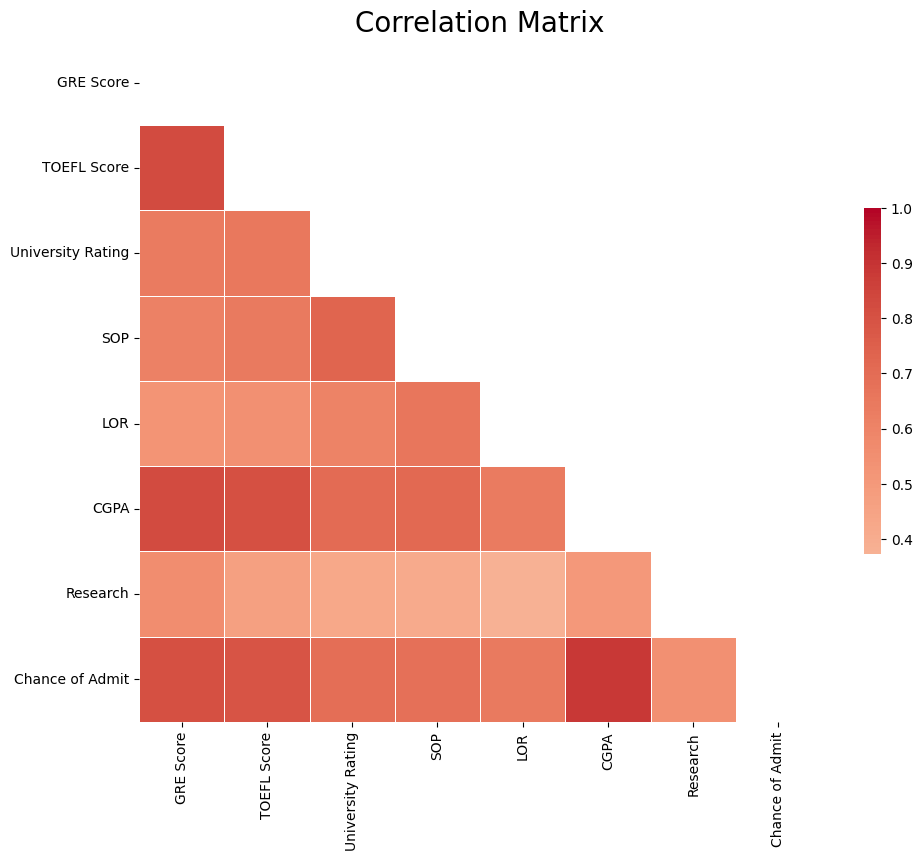

In [ ]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix', fontsize=20)
plt.show()

In [ ]:
x = corr.where(np.triu(np.ones_like(corr, dtype=bool))).stack().reset_index()
x.columns = ['feature_1','feature_2', 'Correlation']
x = x[x.feature_1!=x.feature_2].sort_values('Correlation', ascending=False, key = lambda x: abs(x)).reset_index(drop=True)
x.head(10)

,feature_1,feature_2,Correlation
0,CGPA,Chance of Admit,0.882413
1,GRE Score,TOEFL Score,0.827200
2,GRE Score,CGPA,0.825878
3,TOEFL Score,CGPA,0.810574
4,GRE Score,Chance of Admit,0.810351
5,TOEFL Score,Chance of Admit,0.792228
6,University Rating,SOP,0.728024
7,SOP,CGPA,0.712154
8,University Rating,CGPA,0.705254
9,University Rating,Chance of Admit,0.690132


In [ ]:
x[(x['feature_1']=='Chance of Admit') | (x['feature_2']=='Chance of Admit')]

,feature_1,feature_2,Correlation
0,CGPA,Chance of Admit,0.882413
4,GRE Score,Chance of Admit,0.810351
5,TOEFL Score,Chance of Admit,0.792228
9,University Rating,Chance of Admit,0.690132
10,SOP,Chance of Admit,0.684137
13,LOR,Chance of Admit,0.645365
20,Research,Chance of Admit,0.545871


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
y = df["Chance of Admit"]
X = df.drop("Chance of Admit", axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

# scaler = StandardScaler()
# X_tr_scaled = scaler.fit_transform(X_train)

X_sm = sm.add_constant(X_train)  #Statmodels default is without intercept, to add intercept we need to add constant

sm_model = sm.OLS(y_train, X_sm).fit()

print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     244.1
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          7.20e-129
Time:                        03:17:36   Log-Likelihood:                 501.39
No. Observations:                 350   AIC:                            -986.8
Df Residuals:                     342   BIC:                            -955.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.4324      0.12

In [ ]:
vif = pd.DataFrame()
X_t = pd.DataFrame(X_sm, columns=X_train.columns)
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,GRE Score,1332.58
1,TOEFL Score,1307.04
5,CGPA,986.81
3,SOP,32.44
4,LOR,30.63
2,University Rating,20.15
6,Research,2.90


In [ ]:
y_pred = sm_model.predict(sm.add_constant(X_train))
error = (y_pred-y_train)

In [ ]:
np.mean(error)

4.4250317695774097e-16

### Homoscedascity test

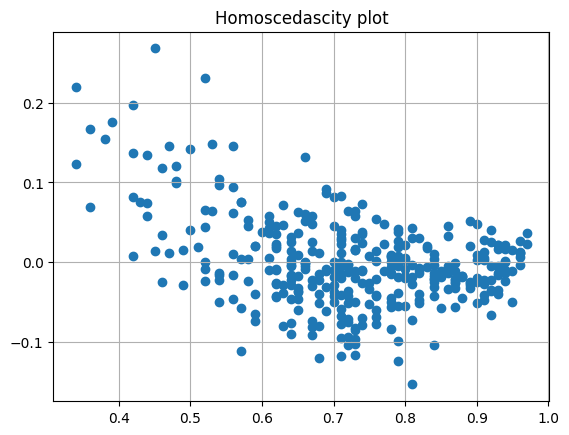

In [ ]:
plt.scatter(y_train, error, label= 'error vs y_train')
plt.title("Homoscedascity plot")
plt.grid()
plt.show()

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_train, X_sm)
lzip(name, test)

[('F statistic', 0.9223637790731198), ('p-value', 0.6989321688927994)]

### Normality of errors

In [ ]:
import plotly.express as px
px.histogram(x=error,nbins=40,title='Distribution of error')

In [ ]:
from scipy.stats import shapiro, anderson
shapiro(error)

ShapiroResult(statistic=0.941691517829895, pvalue=1.6735426933145447e-10)

In [ ]:
anderson(error)

AndersonResult(statistic=4.914377685631962, critical_values=array([0.57 , 0.649, 0.778, 0.908, 1.08 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=4.4250317695774097e-16, scale=0.05784121129258221)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

We can say, errors are normally distributed.

In [ ]:
from sklearn.linear_model import Lasso , Ridge
from sklearn.pipeline import make_pipeline